In [19]:
date = 'March 3, 2021'
player_name = 'T.J. McConnell'
season_type = 'Regular Season'

In [20]:
# Team dictionary for all the relevant info
team_dict = {'ATL': {'name': 'Atlanta Hawks', 'dot':'silver', 'back': 'lightcoral'},
             'BKN': {'name': 'Brooklyn Nets', 'dot':'silver', 'back': 'dimgray'},
             'BOS': {'name': 'Boston Celtics', 'dot':'forestgreen', 'back': 'silver'},
             'CHA': {'name': 'Charlotte Hornets', 'dot':'cyan', 'back': 'c'},
             'CHI': {'name': 'Chicago Bulls', 'dot':'white', 'back': 'black'},
             'CLE': {'name': 'Cleveland Cavaliers', 'dot':'gold', 'back': 'gold'},
             'DAL': {'name': 'Dallas Mavericks', 'dot':'forestgreen', 'back': 'b'},
             'DEN': {'name': 'Denver Nuggets', 'dot':'gold', 'back': 'mediumblue'},
             'DET': {'name': 'Detroit Pistons', 'dot':'white', 'back': 'royalblue'},
             'GSW': {'name': 'Golden State Warriors', 'dot':'gold', 'back': 'darkblue'},
             'HOU': {'name': 'Houston Rockets', 'dot':'green', 'back': 'black'},
             'IND': {'name': 'Indiana Pacers', 'dot':'navy', 'back': 'gold'},
             'LAC': {'name': 'Los Angeles Clippers', 'dot':'green', 'back': 'silver'},
             'LAL': {'name': 'Los Angeles Lakers', 'dot':'gold', 'back': 'rebeccapurple'},
             'MEM': {'name': 'Memphis Grizzlies', 'dot':'gold', 'back': 'steelblue', 'abbrev': 'MEM'},
             'MIA': {'name': 'Miami Heat', 'dot':'yellow', 'back': 'black'},
             'MIL': {'name': 'Milwaukee Bucks', 'dot':'forestgreen', 'back': 'wheat'},
             'MIN': {'name': 'Minnesota Timberwolves', 'dot':'lightslategrey', 'back': 'steelblue'},
             'NOP': {'name': 'New Orleans Pelicans', 'dot':'goldenrod', 'back': 'firebrick'},
             'NYK': {'name': 'New York Knicks', 'dot':'mediumblue', 'back': 'orange'},
             'OKC': {'name': 'Oklahoma City Thunder', 'dot':'orange', 'back': 'blue'},
             'ORL': {'name': 'Orlando Magic', 'dot':'orange', 'back': 'cornflowerblue'},
             'PHI': {'name': 'Philadelphia 76ers', 'dot':'dodgerblue', 'back': 'dodgerblue'},
             'PHX': {'name': 'Phoenix Suns', 'dot':'orange', 'back': 'darkviolet'},
             'POR': {'name': 'Portland Trail Blazers', 'dot':'white', 'back': 'salmon'},
             'SAC': {'name': 'Sacramento Kings', 'dot':'lightgray', 'back': 'darkviolet'},
             'SAS': {'name': 'San Antonio Spurs', 'dot':'white', 'back': 'silver'},
             'TOR': {'name': 'Toronto Raptors', 'dot':'blueviolet', 'back': 'black'},
             'UTA': {'name': 'Utah Jazz', 'dot':'yellow', 'back': 'darkorchid'},
             'WAS': {'name': 'Washington Wizards', 'dot':'silver', 'back': 'navy'}}

In [21]:
# Import Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='LeagueSpartan-Bold.otf')
from matplotlib.patches import Circle, Rectangle, Arc, ConnectionPatch

# Matplotlib Image Properties
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Image library for automatic post-generation
from PIL import Image, ImageDraw

import datetime
from datetime import datetime

In [22]:
def draw_court(ax=None, color='black', lw=2):
    # This function draws the court, borrowed from py-goldsberry.
    
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # Draw the half court line, baseline and side out bound lines
    outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                             color=color, fill=False)
    
    # List of the court elements to be plotted onto the axes
    # Add outer_box to court elements if needed
    court_elements = [hoop, backboard, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc, outer_lines]

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

def pid_tid(player_name):
    # This function returns the PlayerID and TeamID specified by the player's name.
    
    # select the PID of the player
    from nba_api.stats.static import players
    player_dict = players.get_players()
    players = pd.DataFrame(player_dict)
    pid = players[players['full_name'] == player_name]['id'].values[0]
    
    # using PID, select out the TID of the player
    from nba_api.stats.endpoints import commonplayerinfo
    player_info = commonplayerinfo.CommonPlayerInfo(pid).get_data_frames()[0]
    tid = player_info['TEAM_ID'][0]
    tabbrev = player_info['TEAM_ABBREVIATION'][0]
    l_name = player_info['LAST_NAME'][0]
    
    return pid, tid, tabbrev, l_name


def shotchart_df(pid, tid, date, season_type):
    # This function returns the data on the shots for the player on the given date.
    
    # convert date to relevant date format for ShotChartDetail
    df_date = datetime.strptime(date, '%B %d, %Y').strftime('%Y%m%d')
    
    # collect shots for player using the ShortChartDetail Endpoint
    from nba_api.stats.endpoints import shotchartdetail
    df = shotchartdetail.ShotChartDetail(player_id=pid, 
         team_id=tid, context_measure_simple = 'FGA', 
         season_type_all_star=season_type).get_data_frames()[0]
    
    # slice out the shots for the relevant date
    relevant = df[df['GAME_DATE'] == df_date]
    
    return relevant

def draw_shotchart(df, tabbrev):
    # This function draws the shotchart plot and crops it for final use in report
    
    # seleting the shot made dot color based on the team colors
    dot_color = team_dict[tabbrev]['dot']
    
    # Visual Settings
    sns.set(style='white', rc={'axes.facecolor':'black', 'figure.figsize':(11,11)})

    # Drawing the court
    draw_court(color="white", lw=2)
    
    # Plotting the shots 
    markers = {0: 'X', 1: 'o'}
    sns.scatterplot('LOC_X', 'LOC_Y', data=df, hue='SHOT_MADE_FLAG', style='SHOT_MADE_FLAG', 
                    palette=['red', dot_color], markers=markers, s=150);
    
    # Limiting the Plot
    plt.xlim(-300,300)
    plt.ylim(-100,500)

    # Raw save
    plt.savefig('chartplot.png');
    plt.clf();

    # Opens a image in RGB mode 
    im = Image.open('chartplot.png') 

    # Setting the points for cropped image, according to typical Raw save
    left = 149
    top = 171
    right = 663
    bottom = 642

    # Cropped image of above dimension 
    im1 = im.crop((left, top, right, bottom)) 

    # Shows the image in image viewer 
    # CALLING SAVE ON 'chartplot.png' REPLACES ORIGINAL SAVE
    im1.rotate(180).save('chartplot.png')

def game_id(date, tabbrev):
    from nba_api.stats.endpoints import leaguegamefinder
    games = leaguegamefinder.LeagueGameFinder().get_data_frames()[0] 
    today_games = games[games['GAME_DATE'] == datetime.strptime(date, '%B %d, %Y').strftime('%Y-%m-%d')]
    game = today_games[today_games['TEAM_ABBREVIATION'] == tabbrev]
    gid = game['GAME_ID'].values[0]
    location = 'HOME'
    if '@' in game['MATCHUP'].values[0]:
        location = 'VISITOR'
    return gid, location

def boxscores(gid):
    from nba_api.stats.endpoints import boxscoretraditionalv2
    boxscore =  boxscoretraditionalv2.BoxScoreTraditionalV2(gid).get_data_frames()[0]
    return boxscore

def points_fg(boxscore, player_name):
    player_statline = boxscore[boxscore['PLAYER_NAME'] == player_name]
    pts = str(int(player_statline['PTS'].values[0]))
    fg = str(int(player_statline['FGM'].values[0])) + '-' + str(int(player_statline['FGA'].values[0]))
    return pts, fg

def rebounding_stats(boxscore, player_name):
    player_statline = boxscore[boxscore['PLAYER_NAME'] == player_name]
    offensive_rebs = int(player_statline['OREB'].values[0])
    defensive_rebs = int(player_statline['DREB'].values[0])
    total_rebs = int(player_statline['REB'].values[0])
    return offensive_rebs, defensive_rebs, total_rebs

def rebound_ring(info, background_color):
    offensive = info[0]
    defensive = info[1]
    total = info[2]
    
    sizes = [offensive, defensive]
    colors = ['#ff9999', '#66b3ff']
    
    sns.set(style='white', rc={'figure.figsize':(5,5)})
 
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, colors = colors, labels=None, autopct=None, startangle=90,
            wedgeprops={"edgecolor":"black",'linewidth': 5, 'linestyle': 'solid', 'antialiased': True})
    
    #draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white', ec='black', lw=5)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal') 
    
    if offensive != 0:
        plt.plot([-0.05, -0.1], [0.6, 0.75], 'k-', lw=5, color = 'black')
        plt.text(-0.23, 0.435, str(offensive) + ' ORB', fontproperties=prop, size=20, color = '#ff9999');

    plt.plot([0.05, 0.1], [-0.6, -0.75], 'k-', lw=5, color = 'black')
    plt.text(-0.23, -0.55, str(defensive) + ' DRB', fontproperties=prop, size=20, color = '#66b3ff');

    plt.text(-0.25, 0, str(total) + ' REB', fontproperties=prop, size=24, color = 'black');
    
    fig1.set_facecolor(background_color)
    plt.tight_layout()
    #plt.show()
    
    plt.savefig('ring.png', facecolor=background_color)
    plt.clf();
    
    
def match(i):
    if type(i) != str:
        return 0
    if '(' + a_info[n]['l_name'] in i and 'AST)' in i:
        return 1
    return 0

def ast_by_qtr(gid, location, l_name):
    from nba_api.stats.endpoints import playbyplay
    game = playbyplay.PlayByPlay(gid).get_data_frames()[0]
    column = location + 'DESCRIPTION'
    plays = game[[column, 'PERIOD']]
    
    def match(i):
        if type(i) != str:
            return 0
        if '(' + l_name in i and 'AST)' in i:
            return 1
        return 0
    
    plays['relevant'] = plays[column].apply(match).values
    final = plays[plays['relevant'] == 1]
    
    info = final.groupby('PERIOD').count().reset_index()[['PERIOD', 'relevant']]
    return info


def clean_ast(ast_info):
    m = max(ast_info['PERIOD'])
    for i in np.arange(1, m + 1):
        if i not in ast_info['PERIOD'].values:
            ast_info.loc[len(ast_info.index)] = [i, 0]
            
    info_sorted = ast_info.sort_values('PERIOD')
    
    if len(info_sorted) > 4:
        new_periods = []
        for i in ast_info['PERIOD'].values:
            if i < 5:
                new_periods.append(str(i))
            else:
                new_periods.append('OT' + str(i - 4))
        info_sorted['PERIOD'] = new_periods
    return info_sorted
            

def assist_bars(df, background_color):
    #import seaborn as sns
    #import matplotlib.pyplot as plt
    max_assists = max(df['relevant'])

    sns.set(style='white', rc={'axes.facecolor':background_color, 'figure.figsize':(4,4),
                           'figure.facecolor':background_color, 'patch.linewidth': 3,
                           'axes.linewidth' : 4, 'axes.edgecolor': 'white'})

    sns.barplot('PERIOD', 'relevant', data=df, palette = sns.color_palette("bright"));
    plt.xlabel('# Assists by Quarter', fontproperties=prop, size=18, color = 'white');
    plt.ylabel('');
    plt.xticks(fontproperties=prop, size=16, color = 'white')
    plt.yticks([], [])

    for i in np.arange(1, len(df) + 1):
        if df['relevant'].values[i - 1] != 0:
            plt.text(x = i - 1, y = df['relevant'].values[i - 1] - 0.5, s= df['relevant'].values[i - 1],
                     fontproperties=prop, size=16, color = 'white', horizontalalignment='center')

    sns.despine(left=True)
    plt.tight_layout();
    plt.savefig('bars.png', facecolor=background_color);
    plt.clf();
    
    

In [23]:
def maker(date, player_name, season_type):
    # This function compiles together all the other functions to create the final report
    
    # select off the PID and TID of player
    player_info = pid_tid(player_name)
    pid = player_info[0]
    tid = player_info[1]
    tabbrev = player_info[2]
    l_name = player_info[3]
    background_color = team_dict[tabbrev]['back']
    
    # collect relevant shot data:
    shots_df = shotchart_df(pid, tid, date, season_type)
    shots_df['LOC_X'] = shots_df['LOC_X'] * -1
    
    # draw and save the shotchart:
    a = draw_shotchart(shots_df, tabbrev)
    
    # find the game id
    gid = game_id(date, tabbrev)[0]
    location = game_id(date, tabbrev)[1]
    
    # boxscore of the game
    boxscore = boxscores(gid)
    
    # rebounding info
    rebounding_info = rebounding_stats(boxscore, player_name)
    
    # points and fg:
    points = points_fg(boxscore, player_name)[0]
    fg_line = points_fg(boxscore, player_name)[1]
    
    b = rebound_ring(rebounding_info, background_color)
    
    # assists info
    ast_info = ast_by_qtr(gid, location, l_name)
    cleaned_info = clean_ast(ast_info)
    total_assists = str(int(sum(cleaned_info['relevant'])))
    
    # drawing assist bars:
    c = assist_bars(cleaned_info, background_color)
    
    # Creating graphic:
    sns.set(style='white', rc={'axes.facecolor':background_color})
    fig = plt.figure(figsize=(12,12))
    ax=fig.add_subplot(1,1,1)
    ax.set_xlim(-0.5, 0.5)
    ax.set_ylim(0, 1)

    # Adding FBS Logo:
    logo = plt.imread('logo.png');
    ax.add_artist(AnnotationBbox(OffsetImage(logo, zoom=0.20), (-0.475, 0.9725), frameon=False, pad=0.5));

    # FBS
    plt.text(-0.45, 0.960, 'FBS', fontproperties=prop, size=16, color = 'White');

    # Source
    plt.text(0.33, 0.98, 'Source: NBA.com', fontproperties=prop, size=12, color = 'White');

    # Points
    plt.text(-0.42, 0.765, points + ' PTS', fontproperties=prop, size=18, color = 'White');
    # FG line
    plt.text(-0.42, 0.372, fg_line + ' FG', fontproperties=prop, size=16, color = 'White');

    # Adding shotchart:
    chart = plt.imread('chartplot.png');
    ax.add_artist(AnnotationBbox(OffsetImage(chart, zoom=0.5), (-0.225, 0.58), frameon=False, pad=0.5));

    # Adding rebound ring:
    chart = plt.imread('ring.png');
    ax.add_artist(AnnotationBbox(OffsetImage(chart, zoom=0.7), (0.25, 0.18), frameon=False, pad=0.5));

    # Assists
    plt.text(0.08, 0.765, total_assists + ' AST', fontproperties=prop, size=18, color = 'White');

    # Adding assist bars:
    chart = plt.imread('bars.png');
    ax.add_artist(AnnotationBbox(OffsetImage(chart, zoom=0.7), (0.25, 0.57), frameon=False, pad=0.5));

    # Player Name
    plt.text(-0.42, 0.875, player_name + ' - Triple Double Report', fontproperties=prop, size=24, color = 'White');

    #Date
    plt.text(-0.42, 0.835, date, fontproperties=prop, size=18, color = 'White');



    url = 'https://cdn.nba.com/headshots/nba/latest/1040x760/' + str(pid_tid(player_name)[0]) + '.png'
    player = plt.imread(url) 
    ax.add_artist(AnnotationBbox(OffsetImage(player, zoom=0.28), (-0.235, 0.162), frameon=False, pad=0.5))

    # Raw save
    plt.savefig('tripdub.png');

    # Opens a image in RGB mode 
    imfinal = Image.open('tripdub.png') 

    # Setting the points for cropped image, according to typical Raw save
    left = 108
    top = 104
    right = 779
    bottom = 756

    # Cropped image of above dimension 
    imfinalpost = imfinal.crop((left, top, right, bottom)) 

    # Shows the image in image viewer 
    # CALLING SAVE ON 'chart.png' REPLACES ORIGINAL SAVE
    imfinalpost.save('tripdub.png')

ValueError: The palette list has the wrong number of colors.

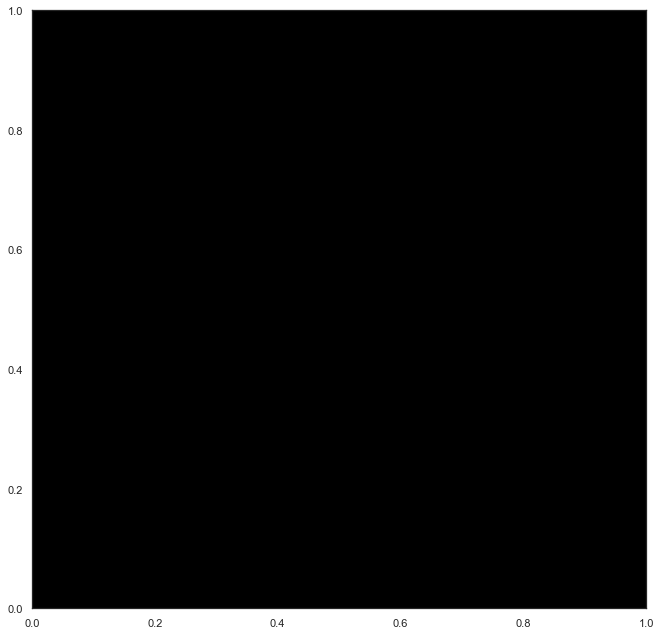

In [24]:
maker(date, player_name, season_type)